# Webscraping

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

df = pd.DataFrame(columns=["date", "text", "link"])
debatelink = []

base_url = "https://www.debates.org"
page = requests.get(urljoin(base_url, "/voter-education/debate-transcripts/"))
soup = BeautifulSoup(page.content, 'html.parser')

links = soup.find_all("a")
for link in links:
    if "debate-transcript" in link.get("href") and "Media" not in link.get("href") and "vice" not in link.get("href"):
        debatelink.append(urljoin(base_url, link.get("href")))
        df.loc[len(df)] = [None, None, urljoin(base_url, link.get("href"))]

for link in df["link"]:
    try:
        page = requests.get(link)
        soup = BeautifulSoup(page.content, 'html.parser')
        text = soup.find_all("p")
        text = [t.get_text() for t in text]
        text = " ".join(text)
        df.loc[df["link"] == link, "text"] = text

        date_link = link.split("/")[5:6] 
        date_link = "-".join(date_link[0].split("-")[:3])
        df.loc[df["link"] == link, "date"] = date_link
    except requests.exceptions.RequestException as e:
        print(f"Error accessing {link}: {e}")

df


,date,text,link
0,,Unofficial transcripts of most presidential an...,https://www.debates.org/voter-education/debate...
1,october-22-2020,Presidential Debate at Belmont University in N...,https://www.debates.org/voter-education/debate...
2,september-29-2020,Presidential Debate at Case Western Reserve Un...,https://www.debates.org/voter-education/debate...
3,october-19-2016,Presidential Debate at the University of Nevad...,https://www.debates.org/voter-education/debate...
4,october-9-2016,Presidential Debate at Washington University i...,https://www.debates.org/voter-education/debate...
...,...,...,...
88,october-22-1976,"\nOctober 22, 1976\n The Third Carter-Ford Pre...",https://www.debates.org/voter-education/debate...
89,september-26-1960,"\nSeptember 26, 1960\n The First Kennedy-Nixon...",https://www.debates.org/voter-education/debate...
90,october-7-1960,"\nOctober 7, 1960\n The Second Kennedy-Nixon P...",https://www.debates.org/voter-education/debate...
91,october-13-1960,"\nOctober 13, 1960\n The Third Kennedy-Nixon P...",https://www.debates.org/voter-education/debate...


In [3]:
df['text'][5]

'Vice Presidential Debate at Longwood University in Farmville, Virginia October 4, 2016 PARTICIPANTS: Senator Tim Kaine (D-VA) and Governor Mike Pence (R-IN) MODERATOR: Elaine Quijano (CBS News) QUIJANO: Good evening. From Longwood University in Farmville, Virginia, and welcome to the first, and only, vice presidential debate of 2016, sponsored by the Commission on Presidential Debates. I’m Elaine Quijano, anchor at CBSN, and correspondent for CBS News. It’s an honor to moderate this debate between Senator Tim Kaine and Governor Mike Pence. Both are longtime public servants who are also proud fathers of sons serving in the U.S. Marines. The campaigns have agreed to the rules of this 90-minute debate. There will be nine different segments covering domestic and foreign policy issues. Each segment will begin with a question to both candidates who will each have two minutes to answer. Then I’ll ask follow-up questions to facilitate a discussion between the candidates. By coin toss, it’s be

In [4]:
len(debatelink)

93

In [5]:
# req = requests.get('https://www.presidency.ucsb.edu/documents/republican-candidates-debate-des-moines-iowa-1')

In [6]:
# req = requests.get('https://www.presidency.ucsb.edu/documents/republican-candidates-debate-des-moines-iowa-1')

In [7]:
# req.status_code

In [8]:
# req.content

In [9]:
# req.text

In [10]:
# sitesoup = BeautifulSoup(req.content)

In [11]:
# [tag.text for tag in sitesoup.select('p')]

In [12]:
import re 
# Function to extract text between all-caps words followed by a colon
def extract_text_segments(text, name):
    pattern = f"{name}:\s*([\s\S]*?)(?=(?:[A-Z]+\s*:\s*|$))"
    matches = re.finditer(pattern, text)
    indices = [(match.start(), match.end()) for match in matches]

    extracted_texts = []
    for i in range(len(indices) - 1):
        start = indices[i][0]
        end = indices[i][1]
        extracted_text = text[start:end].strip()
        extracted_texts.append(extracted_text)

    return extracted_texts

extract_text_segments(df['text'][5], 'CLINTON')

[]

loop through dftext get just clinton, add that extracted text to a row 'clinton' in new dataframe
- year = 
- dict = {'Year':None, 
        'Name':None 
        'Text': None
- df2 = pd.DataFrame(dict) 
- df2.loc[len(df.index)] = ['year, 'name', extracted text]  
- split last 4 characters of 'date' value in df

In [13]:
# names = ['CLINTON', 'TRUMP', 'OBAMA', 'ROMNEY',
#         'MCCAIN', 'BUSH', 'KERRY', 'GORE', 'CLINTON', 'DOLE',
#         'DUKAKIS', 'REAGAN', 'MONDALE', 'CARTER', 'FORD', 'NIXON',
#         'KENNEDY', 'ANDERSON']

# dict = {'Year':[None], 
#         'Name':[None], 
#         'Text': [None]}
# df2 = pd.DataFrame(dict) 
                            
# def text_extractor(data):
#     for row in data:
#         for name in names:
#             extracted_text = extract_text_segments(data, name)
#             year = df['date'].str[-4:]
#             df2.loc[len(df.index)] = [year, name, extracted_text]
#     return df2

# text_extractor(df['text'])

In [14]:
import pandas as pd

names = ['CLINTON', 'TRUMP', 'OBAMA', 'ROMNEY', 'MCCAIN', 'BUSH', 'KERRY', 'GORE', 'CLINTON', 'DOLE', 'DUKAKIS', 'REAGAN', 'MONDALE', 'CARTER', 'FORD', 'NIXON', 'KENNEDY', 'ANDERSON']

dict2 = {'Year': [], 'Name': [], 'Text': []}
df2 = pd.DataFrame(dict2, dtype='object')

def text_extractor(data):
    for name in names:
        for index, row in df.iterrows():
            if name in row['text']:
                extracted_text = extract_text_segments(row['text'], name)
                year = row['date'][-4:]
                df2.loc[len(df2.index)] = [year, name, extracted_text]
    return df2

result_df = text_extractor(df)
print(result_df)


     Year      Name                                               Text
0    2016   CLINTON  [CLINTON: Thank you very much, Chris. And than...
1    2016   CLINTON  [CLINTON: Well, thank you. Are you a teacher? ...
2    2016   CLINTON  [CLINTON: How are you, Donald? [applause], CLI...
3    1996   CLINTON  [CLINTON: I was going to applaud, too. Well, t...
4    1996   CLINTON  [CLINTON: Thank you, Jim. And thank you to the...
..    ...       ...                                                ...
163  1960   KENNEDY  [KENNEDY: In the first place I’ve never sugges...
164  1960   KENNEDY  [KENNEDY: Good evening, Mr. Shadel. MR., KENNE...
165  1960   KENNEDY  [KENNEDY: Good evening, Mr. Howe. MR., KENNEDY...
166  1980  ANDERSON  [ANDERSON: Miss Loomis, I think it’s very appr...
167  1980  ANDERSON  [ANDERSON: Miss Loomis, I think it’s very appr...

[168 rows x 3 columns]


In [15]:
# result_df['Text'] = " ".join(map(str, result_df['Text']))

In [16]:
result_df['Text']= [" ".join(x) for x in result_df['Text']]

In [17]:
result_df['Text'][1]

'CLINTON: Well, thank you. Are you a teacher? Yes, I think that that’s a very good question, because I’ve heard from lots of teachers and parents about some of their concerns about some of the things that are being said and done in this campaign. And I think it is very important for us to make clear to our children that our country really is great because we’re good. And we are going to respect one another, lift each other up. We are going to be looking for ways to celebrate our diversity, and we are going to try to reach out to every boy and girl, as well as every adult, to bring them in to working on behalf of our country. I have a very positive and optimistic view about what we can do together. That’s why the slogan of my campaign is “Stronger Together,” because I think if we work together, if we overcome the divisiveness that sometimes sets Americans against one another, and instead we make some big goals—and I’ve set forth some big goals, getting the economy to work for everyone, 

In [18]:
#making text column into one string from a list of strings, another method

# test = result_df['Text'].str.join("")
# test[1]

In [19]:
type(result_df['Text'][1])

str

In [20]:
result_df.to_csv('test.csv')

In [21]:
result_df.iloc[166] == result_df.iloc[167]

Year    True
Name    True
Text    True
dtype: bool

In [22]:
result_df['Text'] = result_df['Text'].drop_duplicates(keep='first')
result_df

,Year,Name,Text
0,2016,CLINTON,"CLINTON: Thank you very much, Chris. And thank..."
1,2016,CLINTON,"CLINTON: Well, thank you. Are you a teacher? Y..."
2,2016,CLINTON,"CLINTON: How are you, Donald? [applause] CLINT..."
3,1996,CLINTON,"CLINTON: I was going to applaud, too. Well, th..."
4,1996,CLINTON,"CLINTON: Thank you, Jim. And thank you to the ..."
...,...,...,...
163,1960,KENNEDY,NaN
164,1960,KENNEDY,NaN
165,1960,KENNEDY,NaN
166,1980,ANDERSON,"ANDERSON: Miss Loomis, I think it’s very appro..."


In [23]:
result_df.dropna(inplace=True)

In [24]:
result_df[result_df['Text'].isna() == True]

,Year,Name,Text


In [25]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    74 non-null     object
 1   Name    74 non-null     object
 2   Text    74 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [26]:
# Write a function for the below


In [27]:
mask = (result_df['Name'] == "CLINTON") & (result_df['Year'] == "2016")
result_df.loc[mask, 'Name'] = "H_CLINTON"

In [28]:
mask = (result_df['Name'] == "CLINTON") & (result_df['Year'] == "1992")
result_df.loc[mask, 'Name'] = "B_CLINTON"

In [29]:
mask = (result_df['Name'] == "CLINTON") & (result_df['Year'] == "1996")
result_df.loc[mask, 'Name'] = "B_CLINTON"

In [30]:
mask = (result_df['Name'] == "BUSH") & (result_df['Year'] == "2008")
result_df.loc[mask, 'Name'] = "BUSH_2"

In [31]:
mask = (result_df['Name'] == "BUSH") & (result_df['Year'] == "2004")
result_df.loc[mask, 'Name'] = "BUSH_2"

In [32]:
mask = (result_df['Name'] == "BUSH") & (result_df['Year'] == "2000")
result_df.loc[mask, 'Name'] = "BUSH_2"

In [33]:
mask = (result_df['Name'] == "BUSH") & (result_df['Year'] == "1988") 
result_df.loc[mask, 'Name'] = "BUSH_1"

In [34]:
mask = (result_df['Name'] == "BUSH") & (result_df['Year'] == "1992") 
result_df.loc[mask, 'Name'] = "BUSH_1"

In [35]:
result_df['Name'].value_counts()

Name
B_CLINTON    7
BUSH_1       7
OBAMA        6
BUSH_2       6
GORE         5
TRUMP        5
KENNEDY      4
NIXON        4
FORD         4
CARTER       4
H_CLINTON    3
KERRY        3
MCCAIN       3
ROMNEY       3
DOLE         2
DUKAKIS      2
REAGAN       2
MONDALE      2
BUSH         1
ANDERSON     1
Name: count, dtype: int64

In [36]:
result_df = result_df[result_df['Name'] != "BUSH"]

In [37]:
result_df

,Year,Name,Text
0,2016,H_CLINTON,"CLINTON: Thank you very much, Chris. And thank..."
1,2016,H_CLINTON,"CLINTON: Well, thank you. Are you a teacher? Y..."
2,2016,H_CLINTON,"CLINTON: How are you, Donald? [applause] CLINT..."
3,1996,B_CLINTON,"CLINTON: I was going to applaud, too. Well, th..."
4,1996,B_CLINTON,"CLINTON: Thank you, Jim. And thank you to the ..."
...,...,...,...
158,1960,KENNEDY,"KENNEDY: Good evening, Mr. Howe. MR. KENNEDY: ..."
159,1960,KENNEDY,"KENNEDY: Good evening, Mr. Shadel. MR. KENNEDY..."
160,1960,KENNEDY,KENNEDY: In the first place I’ve never suggest...
161,1960,KENNEDY,"KENNEDY: Mr. Smith, Mr. Nixon. In the election..."


In [38]:
len(result_df)

73

In [39]:
result_df['Name'].value_counts()

Name
BUSH_1       7
B_CLINTON    7
OBAMA        6
BUSH_2       6
GORE         5
TRUMP        5
CARTER       4
KENNEDY      4
NIXON        4
FORD         4
H_CLINTON    3
KERRY        3
MCCAIN       3
ROMNEY       3
DUKAKIS      2
REAGAN       2
MONDALE      2
DOLE         2
ANDERSON     1
Name: count, dtype: int64

In [40]:
dems = ['B_CLINTON', 'OBAMA', 'GORE', 'CARTER', 'KENNEDY', 'H_CLINTON', 'KERRY', 'DUKAKIS', 'MONDALE']
ind = ['DOLE', 'ANDERSON']

result_df['Target'] = 2  # Default value for rows not matching dems or ind

for row in result_df['Name']:
    if row in dems:
        result_df.loc[result_df['Name'] == row, 'Target'] = 0
    elif row in ind:
        result_df.loc[result_df['Name'] == row, 'Target'] = 1

result_df


/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_14354/569863851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Target'] = 2  # Default value for rows not matching dems or ind


,Year,Name,Text,Target
0,2016,H_CLINTON,"CLINTON: Thank you very much, Chris. And thank...",0
1,2016,H_CLINTON,"CLINTON: Well, thank you. Are you a teacher? Y...",0
2,2016,H_CLINTON,"CLINTON: How are you, Donald? [applause] CLINT...",0
3,1996,B_CLINTON,"CLINTON: I was going to applaud, too. Well, th...",0
4,1996,B_CLINTON,"CLINTON: Thank you, Jim. And thank you to the ...",0
...,...,...,...,...
158,1960,KENNEDY,"KENNEDY: Good evening, Mr. Howe. MR. KENNEDY: ...",0
159,1960,KENNEDY,"KENNEDY: Good evening, Mr. Shadel. MR. KENNEDY...",0
160,1960,KENNEDY,KENNEDY: In the first place I’ve never suggest...,0
161,1960,KENNEDY,"KENNEDY: Mr. Smith, Mr. Nixon. In the election...",0


In [41]:
result_df[result_df['Name'] == "REAGAN"]

,Year,Name,Text,Target
126,1980,REAGAN,REAGAN: I don’t know what the differences migh...,2
127,1980,REAGAN,REAGAN: I believe that the only unpopular meas...,2


In [42]:
result_df['Target'].value_counts()

Target
0    36
2    34
1     3
Name: count, dtype: int64

In [43]:
result_df['Text'][0]

'CLINTON: Thank you very much, Chris. And thanks to UNLV for hosting us. You know, I think when we talk about the Supreme Court, it really raises the central issue in this election, namely, what kind of country are we going to be? What kind of opportunities will we provide for our citizens? What kind of rights will Americans have? And I feel strongly that the Supreme Court needs to stand on the side of the American people, not on the side of the powerful corporations and the wealthy. For me, that means that we need a Supreme Court that will stand up on behalf of women’s rights, on behalf of the rights of the LGBT community, that will stand up and say no to Citizens United, a decision that has undermined the election system in our country because of the way it permits dark, unaccountable money to come into our electoral system. I have major disagreements with my opponent about these issues and others that will be before the Supreme Court. But I feel that at this point in our country’s h

In [44]:
candidates = ['CLINTON:', 'OBAMA:', 'GORE:', 'CARTER:', 'KENNEDY:', 'KERRY:', 'DUKAKIS:', 'MONDALE:', 'DOLE:', 'ANDERSON:', 'BUSH:', "TRUMP:", "NIXON:", "MCCAIN:", 'FORD:', 'ROMNEY:', 'REAGAN:']

# Iterate through each row in the "Text" column
for index, row in result_df.iterrows():
    text = row['Text']
    
    # Iterate through each candidate in the list
    for candidate in candidates:
        # Check if candidate is in the text
        if candidate in text:
            # Replace candidate with an empty string
            text = text.replace(candidate, "")
    
    # Update the "Text" column with the modified text
    result_df.at[index, 'Text'] = text

result_df['Text'][1]

' Well, thank you. Are you a teacher? Yes, I think that that’s a very good question, because I’ve heard from lots of teachers and parents about some of their concerns about some of the things that are being said and done in this campaign. And I think it is very important for us to make clear to our children that our country really is great because we’re good. And we are going to respect one another, lift each other up. We are going to be looking for ways to celebrate our diversity, and we are going to try to reach out to every boy and girl, as well as every adult, to bring them in to working on behalf of our country. I have a very positive and optimistic view about what we can do together. That’s why the slogan of my campaign is “Stronger Together,” because I think if we work together, if we overcome the divisiveness that sometimes sets Americans against one another, and instead we make some big goals—and I’ve set forth some big goals, getting the economy to work for everyone, not just

In [45]:
result_df['Text'][5]

' No. There are many people who believe that the only way we can get this country turned around is to tax the middle class more and punish them more, but the truth is that middle-class Americans are basically the only group of Americans who’ve been taxed more in the 1980s and during the last 12 years, even though their incomes have gone down. The wealthiest Americans have been taxed much less, even though their incomes have gone up. Middle-class people will have their fair share of changing to do, and many challenges to face, including the challenge of becoming constantly re-educated. But my plan is a departure from trickle-down economics, just cutting taxes on the wealthiest Americans and getting out of the way. It’s also a departure from tax-and- spend economics, because you can’t tax and divide an economy that isn’t growing. I propose an American version of what works in other countries — I think we can do it better: invest and grow. I believe we can increase investment and reduce t

In [46]:
result_df['Name'].value_counts()

Name
BUSH_1       7
B_CLINTON    7
OBAMA        6
BUSH_2       6
GORE         5
TRUMP        5
CARTER       4
KENNEDY      4
NIXON        4
FORD         4
H_CLINTON    3
KERRY        3
MCCAIN       3
ROMNEY       3
DUKAKIS      2
REAGAN       2
MONDALE      2
DOLE         2
ANDERSON     1
Name: count, dtype: int64

# NLP

In [47]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer

[nltk_data] Downloading package wordnet to /Users/nathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /Users/nathan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nathan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
result_df['text_lower'] = ["".join(item for item in lst).lower() for lst in result_df['Text']]

/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_14354/2379029665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['text_lower'] = ["".join(item for item in lst).lower() for lst in result_df['Text']]


In [49]:
type(result_df['text_lower'][1])

str

In [50]:
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocessing(text, tokenizer, stopwords, lemmatizer):
    # Make everything in the df["Text"] column into a lower-case string
    #text = ["".join(item for item in lst).lower() for lst in text]

    # Tokenize
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    
    return tokens

In [51]:
# Apply the preprocessing function to the 'Text' column
result_df['tokens'] = result_df['text_lower'].apply(lambda x: preprocessing(x, tokenizer, stopwords, lemmatizer))
result_df

/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_14354/3680094196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['tokens'] = result_df['text_lower'].apply(lambda x: preprocessing(x, tokenizer, stopwords, lemmatizer))


,Year,Name,Text,Target,text_lower,tokens
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"thank you very much, chris. and thanks to unl...","[thank, much, chris, thanks, unlv, hosting, kn..."
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"well, thank you. are you a teacher? yes, i th...","[well, thank, teacher, yes, think, good, quest..."
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"how are you, donald? [applause] well, thank ...","[donald, applause, well, thank, lester, thanks..."
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"i was going to applaud, too. well, thank you,...","[going, applaud, well, thank, jim, thanks, peo..."
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"thank you, jim. and thank you to the people o...","[thank, jim, thank, people, hartford, host, wa..."
...,...,...,...,...,...,...
158,1960,KENNEDY,"Good evening, Mr. Howe. MR. Mr. Howe, Mr. Vi...",0,"good evening, mr. howe. mr. mr. howe, mr. vi...","[good, evening, howe, howe, vice, president, f..."
159,1960,KENNEDY,"Good evening, Mr. Shadel. MR. Mr. McGee, we ...",0,"good evening, mr. shadel. mr. mr. mcgee, we ...","[good, evening, shadel, mcgee, contractual, ri..."
160,1960,KENNEDY,In the first place I’ve never suggested that ...,0,in the first place i’ve never suggested that ...,"[first, place, never, suggested, cuba, lost, e..."
161,1960,KENNEDY,"Mr. Smith, Mr. Nixon. In the election of 1860...",0,"mr. smith, mr. nixon. in the election of 1860...","[smith, nixon, election, 1860, abraham, lincol..."


In [52]:
# preprocessing("test of a string blah,", tokenizer, stopwords, lemmatizer)

In [53]:
# tokenized_df = result_df['text_lower'].apply((lambda x: preprocessing(x, tokenizer, stopwords, lemmatizer)))
# result_df['tokens'] = tokenized_df
# result_df['tokens'][1]

In [54]:
type(result_df['tokens'][0])

list

In [55]:
result_df['tokens'][0]

['thank',
 'much',
 'chris',
 'thanks',
 'unlv',
 'hosting',
 'know',
 'think',
 'talk',
 'supreme',
 'court',
 'really',
 'raise',
 'central',
 'issue',
 'election',
 'namely',
 'kind',
 'country',
 'going',
 'kind',
 'opportunity',
 'provide',
 'citizen',
 'kind',
 'right',
 'american',
 'feel',
 'strongly',
 'supreme',
 'court',
 'need',
 'stand',
 'side',
 'american',
 'people',
 'side',
 'powerful',
 'corporation',
 'wealthy',
 'mean',
 'need',
 'supreme',
 'court',
 'stand',
 'behalf',
 'woman',
 'right',
 'behalf',
 'right',
 'lgbt',
 'community',
 'stand',
 'say',
 'citizen',
 'united',
 'decision',
 'undermined',
 'election',
 'system',
 'country',
 'way',
 'permit',
 'dark',
 'unaccountable',
 'money',
 'come',
 'electoral',
 'system',
 'major',
 'disagreement',
 'opponent',
 'issue',
 'others',
 'supreme',
 'court',
 'feel',
 'point',
 'country',
 'history',
 'important',
 'reverse',
 'marriage',
 'equality',
 'reverse',
 'roe',
 'wade',
 'stand',
 'citizen',
 'united',
 'st

In [56]:
# Assuming 'tokens' is the column containing lists of strings
#result_df['tokens'] = result_df['tokens'].apply(lambda x: ' '.join(x))
#result_df['tokens'][0]

In [57]:
# result_df['string_tokens'] = result_df['tokens'].str.join(" ")

# result_df['string_tokens']= [" ".join(x) for x in result_df['tokens']]

######
# string_tokens_list = []
# test_df = result_df
# test_df = test_df.reset_index(drop=True)
# test_df['string_tokens'] = string_tokens_list

# for lst in test_df['tokens']:
#     for item in lst:
#         string = " ".join(x for x in item)
#         string_tokens_list.append(string)

# test_df['string_tokens'] = string_tokens_list

########
# for list in result_df['tokens']:
#     for item in list:
#         string = " ".join(x for x in item)
#         result_df['string_tokens'] = string
#         result_df['string_tokens'].append(x)
        

## NLP Modelling

In [58]:
result_df.isna().sum()

Year          0
Name          0
Text          0
Target        0
text_lower    0
tokens        0
dtype: int64

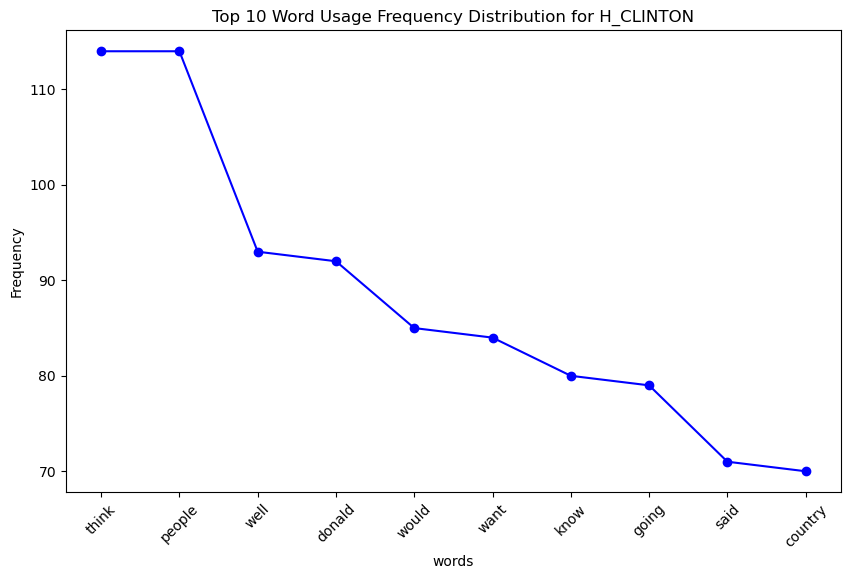

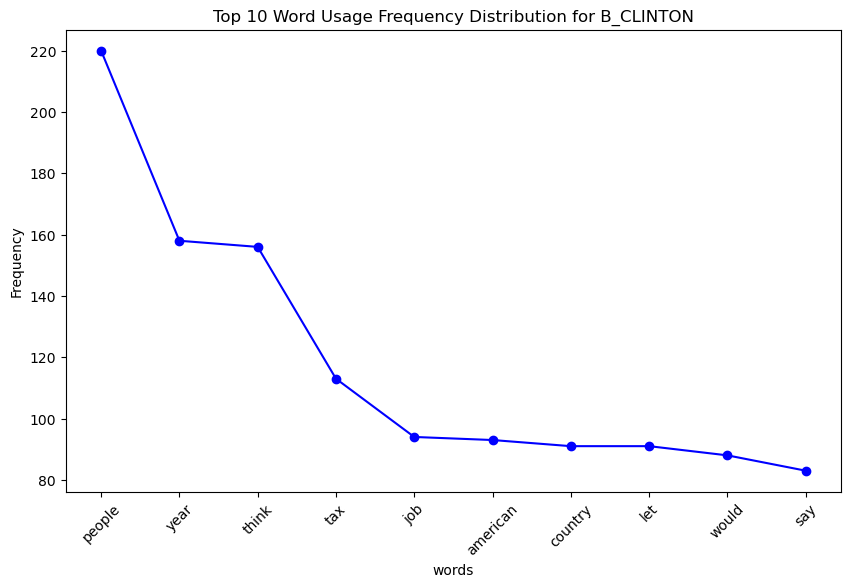

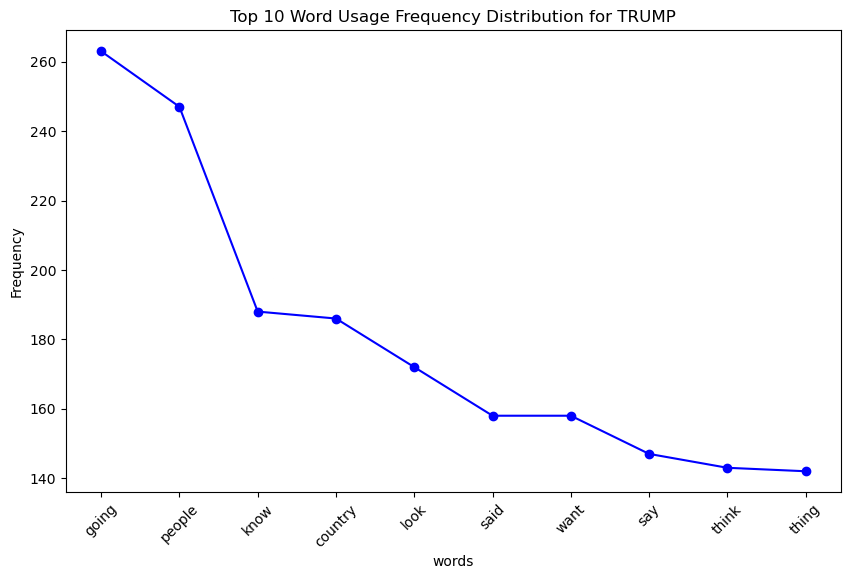

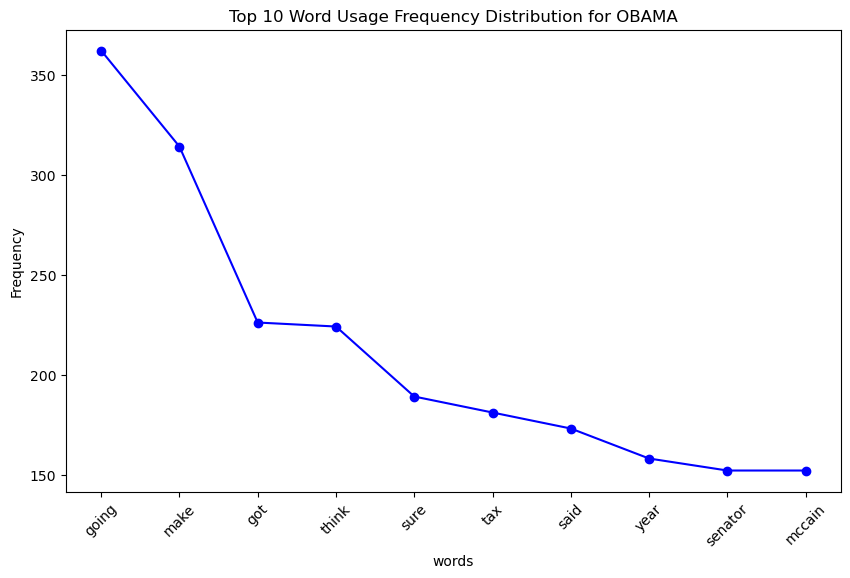

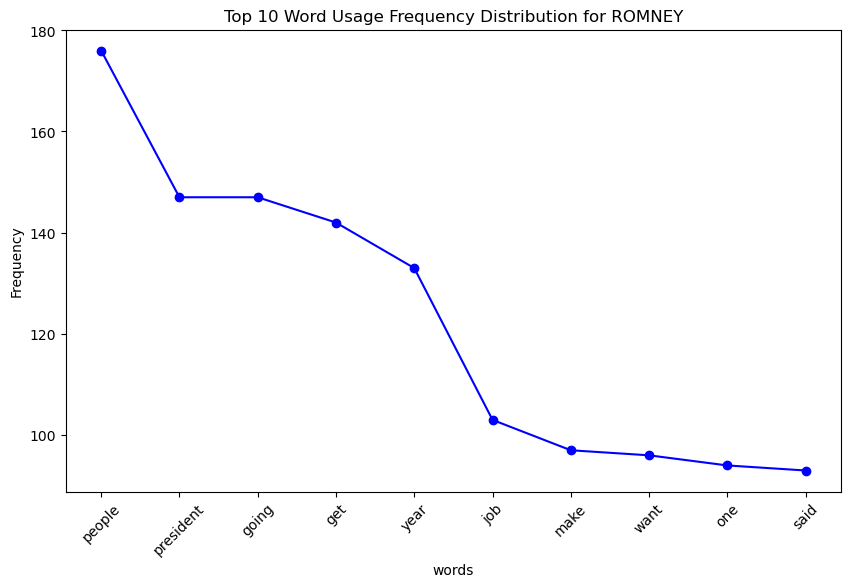

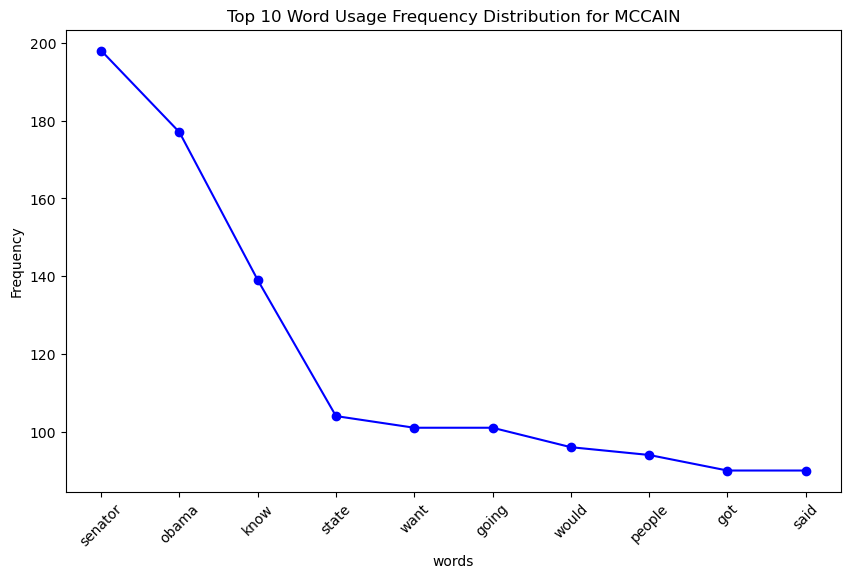

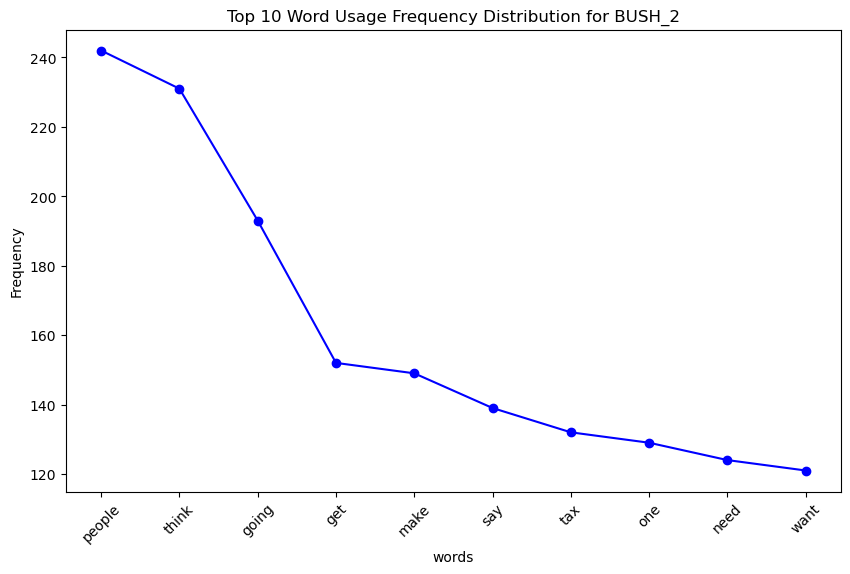

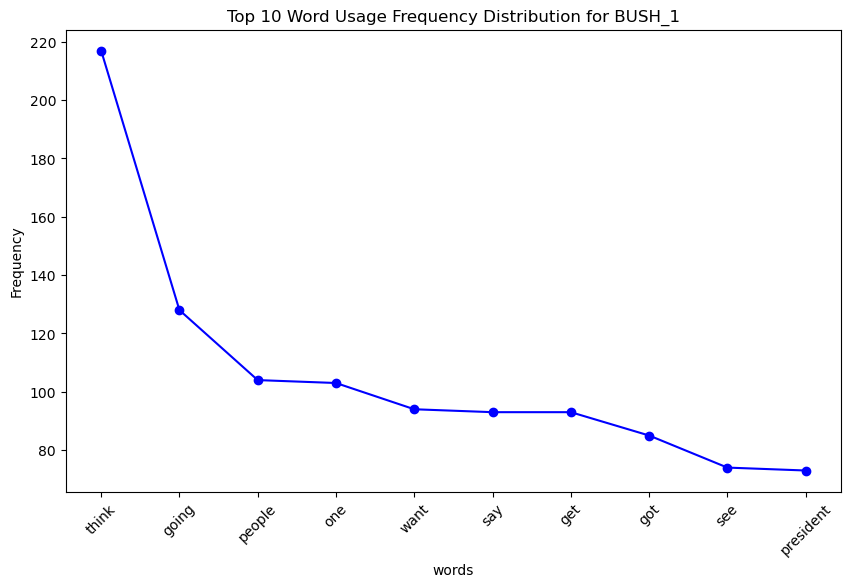

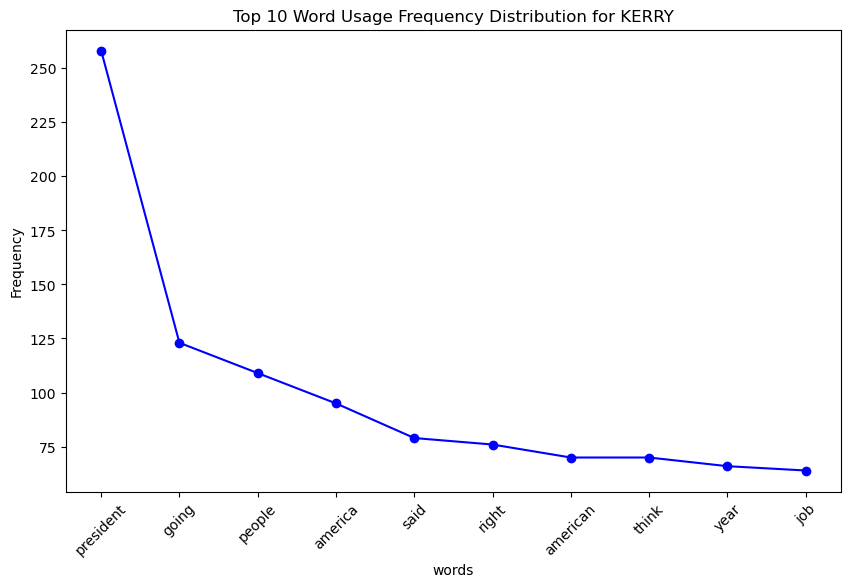

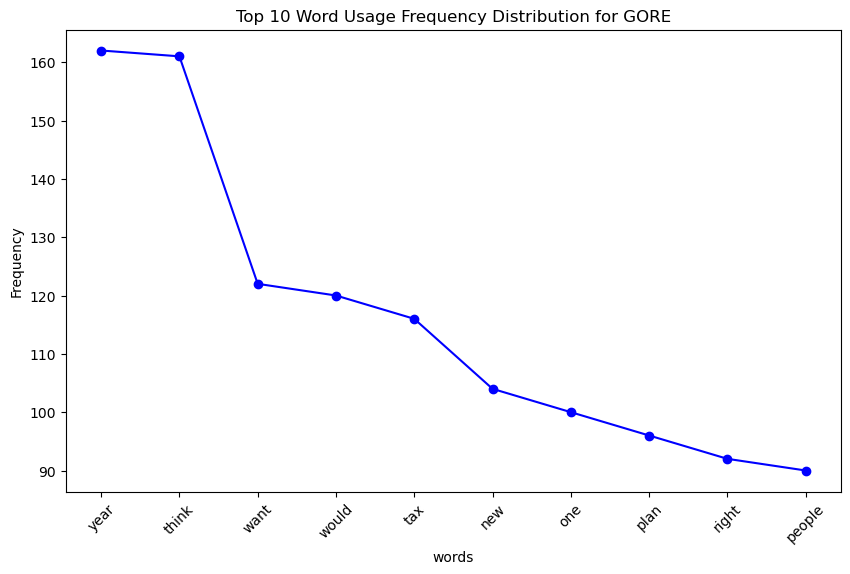

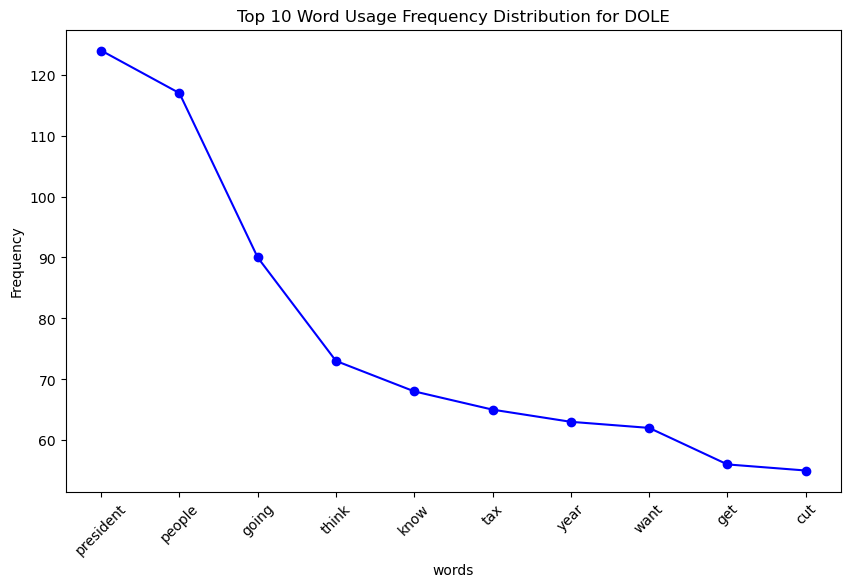

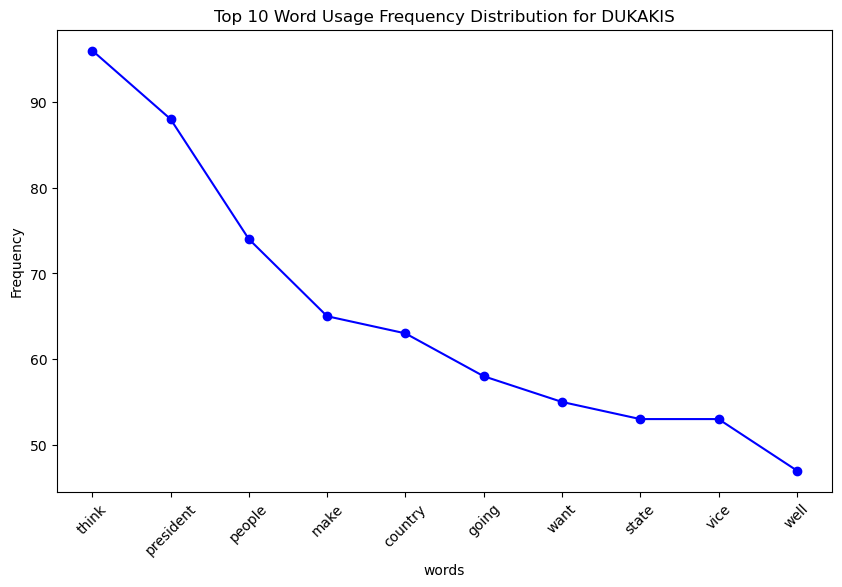

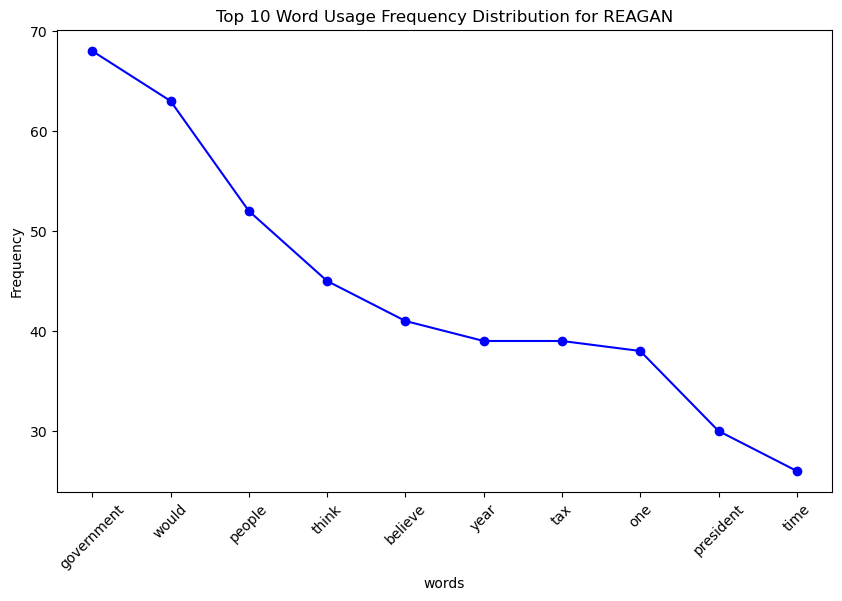

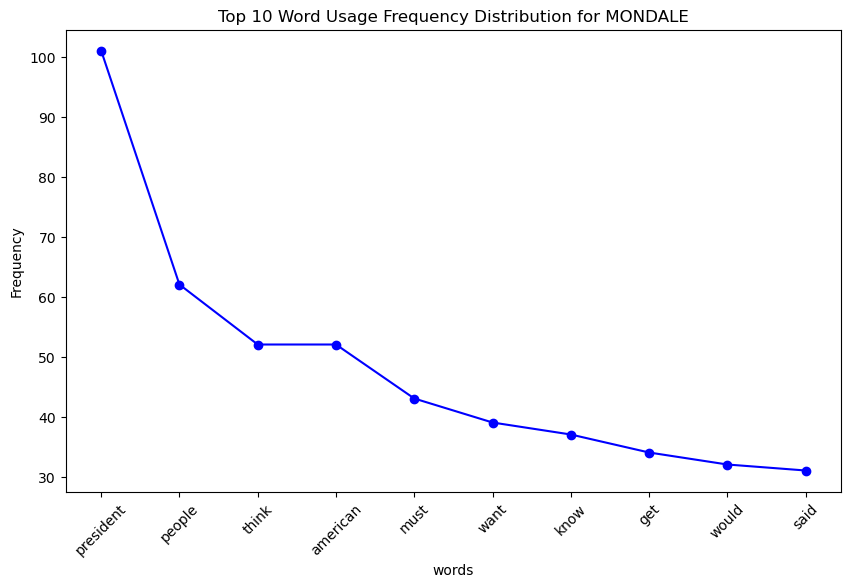

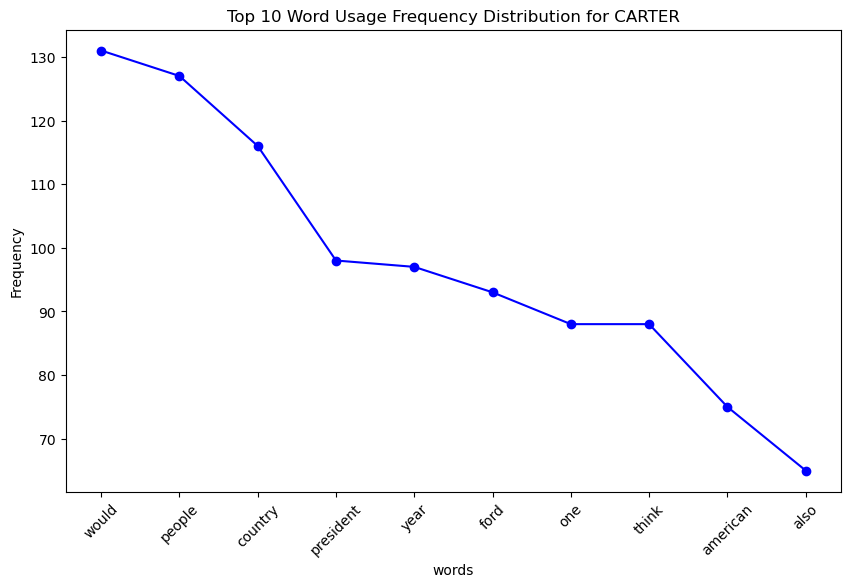

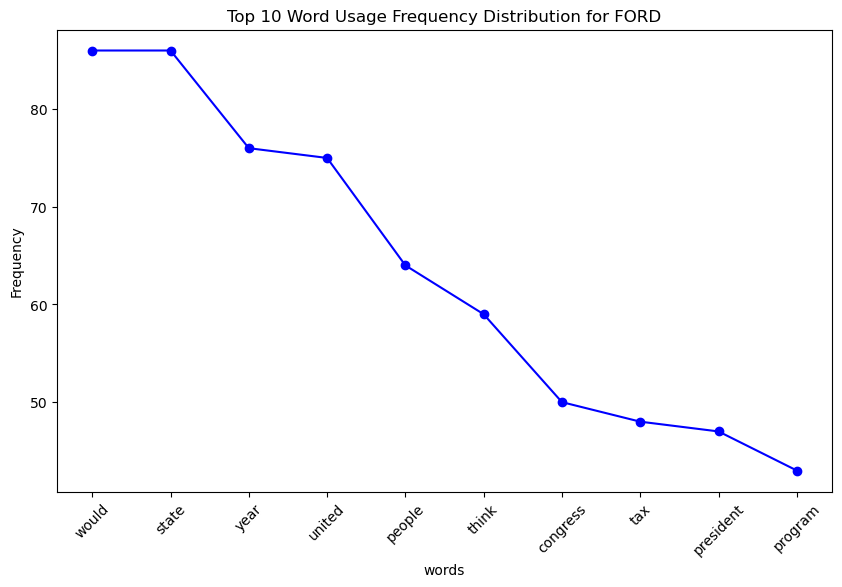

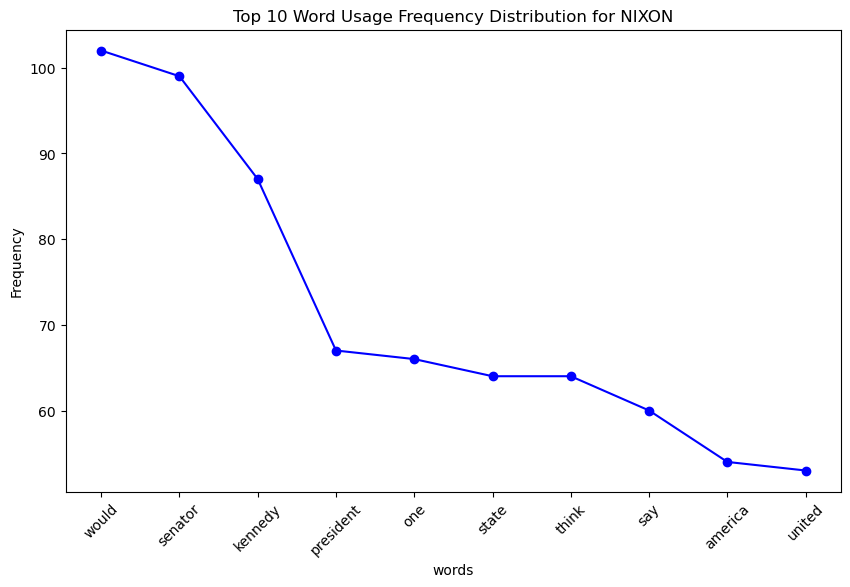

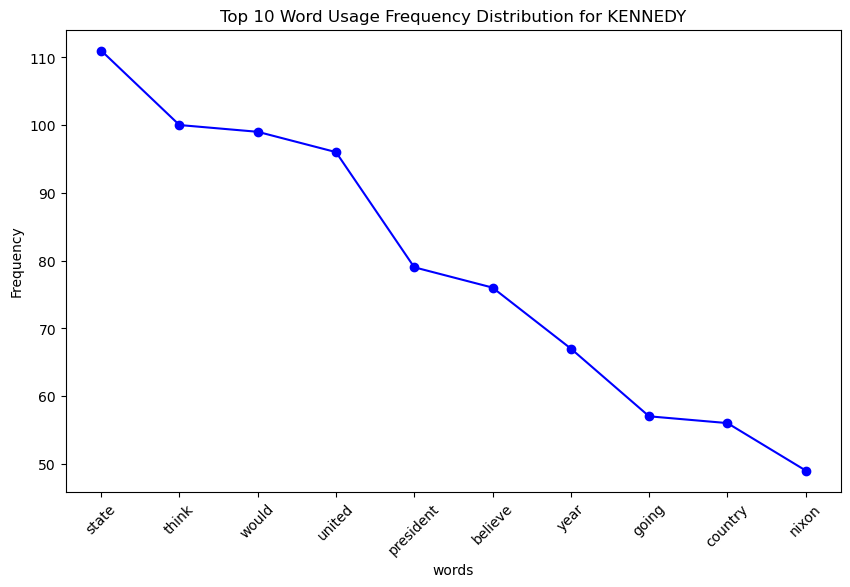

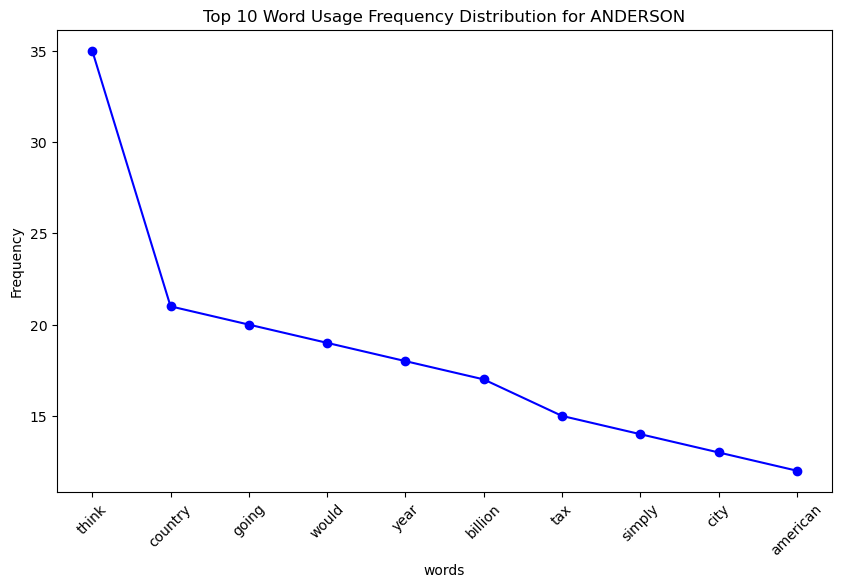

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk.probability import FreqDist

# Create a frequency distribution for each speaker
speaker_freq_dist = {}
for speaker in result_df['Name'].unique():
    #tokens = [token for sublist in result_df[result_df['Name'] == speaker]['tokens'] for token in sublist]
    tokens = [token for sublist in result_df[result_df['Name'] == speaker]['tokens'] for token in sublist]

    freq_dist = FreqDist(tokens)
    
    # Check if the frequency distribution is not empty
    if freq_dist and freq_dist.N():
        # Get the top 10 tokens
        top_tokens = freq_dist.most_common(10)
        
        # Create a frequency distribution for the top 10 tokens
        top_freq_dist = FreqDist(dict(top_tokens))
        speaker_freq_dist[speaker] = top_freq_dist

# Plot the frequency distribution for each speaker using a line graph
for speaker, freq_dist in speaker_freq_dist.items():
    plt.figure(figsize=(10, 6))
    
    # Extract words and frequencies
    words, frequencies = zip(*freq_dist.items())
    tickvals = range(0,len(words))
    
# Use Pandas Series plot function with kind='line'
    pd.Series(frequencies, index=words).plot(kind='line', marker='o', linestyle='-', color='b')
    
    plt.title(f"Top 10 Word Usage Frequency Distribution for {speaker}")
    plt.xlabel("words")
    plt.ylabel("Frequency")
    plt.xticks(ticks=tickvals, labels= words, rotation=45)
    plt.show()

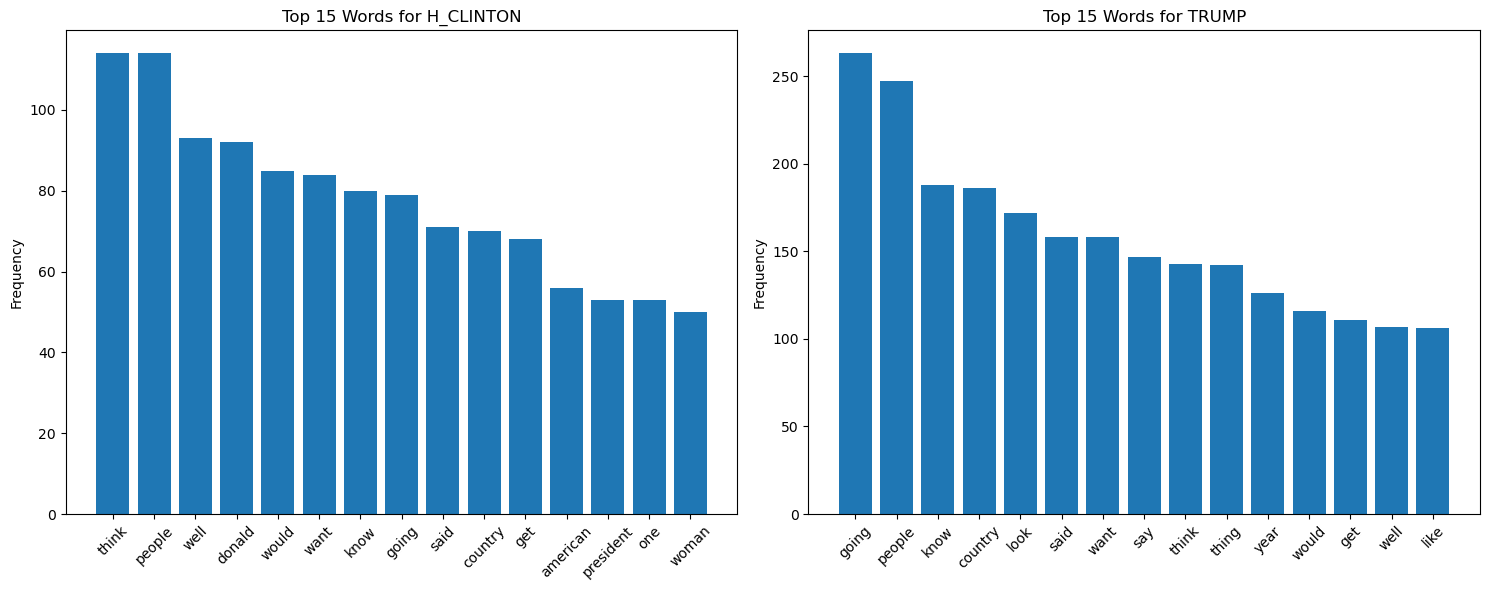

In [75]:
def plot_speaker_comparison(speaker1, speaker2, df, num_words=15):
    """
    Plot the top 'num_words' used by two speakers side by side.

    :param speaker1: Name of the first speaker.
    :param speaker2: Name of the second speaker.
    :param df: DataFrame containing the speakers and tokens.
    :param num_words: Number of top words to plot (default is 15).
    """
    
    # Initialize subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Loop over speakers
    for idx, speaker in enumerate([speaker1, speaker2]):
        # Extract tokens for the speaker
        tokens = [token for token_list in df[df['Name'] == speaker]['tokens'] for token in token_list]

        # Create frequency distribution and get top tokens
        freq_dist = FreqDist(tokens)
        top_tokens = freq_dist.most_common(num_words)

        # Extract words and frequencies
        words, frequencies = zip(*top_tokens)

        # Plot
        axes[idx].bar(words, frequencies)
        axes[idx].set_title(f"Top {num_words} Words for {speaker}")
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Example usage
plot_speaker_comparison('H_CLINTON', 'TRUMP', result_df)


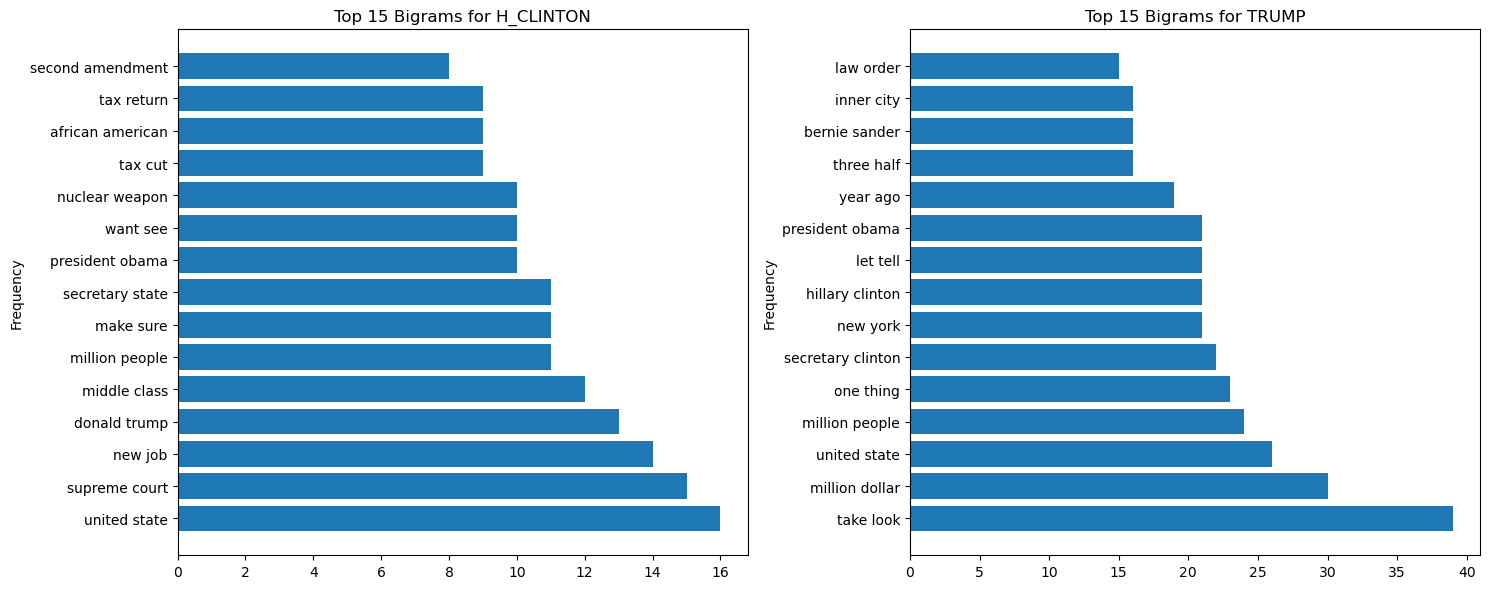

In [94]:
import matplotlib.pyplot as plt
from nltk import FreqDist, bigrams as bg
from itertools import chain

def plot_speaker_comparison_bigrams(speaker1, speaker2, df, num_words=15):
    """
    Plot the top 'num_words' bigrams used by two speakers side by side.

    :param speaker1: Name of the first speaker.
    :param speaker2: Name of the second speaker.
    :param df: DataFrame containing the speakers and tokens.
    :param num_words: Number of top bigrams to plot (default is 15).
    """

    # Initialize subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Loop over speakers
    for idx, speaker in enumerate([speaker1, speaker2]):
        # Extract tokens for the speaker
        token_lists = df[df['Name'] == speaker]['tokens']
        
        # Create bigrams from the list of tokens
        bigram_list = list(chain(*[bg(token_list) for token_list in token_lists]))

        # Create frequency distribution and get top bigrams
        freq_dist = FreqDist(bigram_list)
        top_bigrams = freq_dist.most_common(num_words)

        # Extract bigrams and frequencies
        bigrams, frequencies = zip(*top_bigrams)
        bigram_labels = [' '.join(bigram) for bigram in bigrams]

        # Plot
        axes[idx].barh(bigram_labels, frequencies)
        axes[idx].set_title(f"Top {num_words} Bigrams for {speaker}")
        axes[idx].tick_params(axis='x')
        axes[idx].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Example usage
plot_speaker_comparison_bigrams('H_CLINTON', 'TRUMP', result_df)


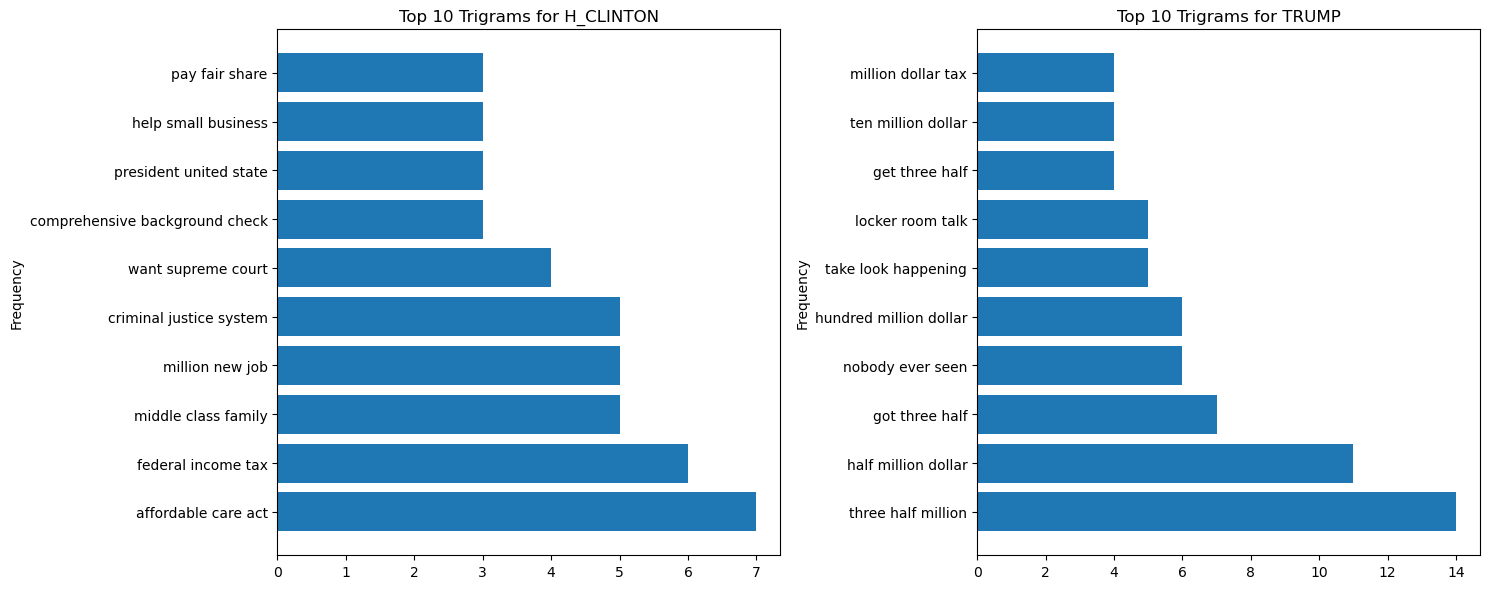

In [89]:
import matplotlib.pyplot as plt
from nltk import FreqDist, trigrams
from itertools import chain

def plot_speaker_comparison_trigrams(speaker1, speaker2, df, num_trigrams=10):
    """
    Plot the top 'num_trigrams' trigrams used by two speakers side by side.

    :param speaker1: Name of the first speaker.
    :param speaker2: Name of the second speaker.
    :param df: DataFrame containing the speakers and tokens.
    :param num_trigrams: Number of top trigrams to plot (default is 10).
    """

    # Initialize subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Loop over speakers
    for idx, speaker in enumerate([speaker1, speaker2]):
        # Extract tokens for the speaker
        token_lists = df[df['Name'] == speaker]['tokens']
        
        # Create trigrams from the list of tokens
        trigram_list = list(chain(*[trigrams(token_list) for token_list in token_lists]))

        # Create frequency distribution and get top trigrams
        freq_dist = FreqDist(trigram_list)
        top_trigrams = freq_dist.most_common(num_trigrams)

        # Extract trigrams and frequencies
        trigram_tuples, frequencies = zip(*top_trigrams)
        trigram_labels = [' '.join(trigram) for trigram in trigram_tuples]

        # Plot
        axes[idx].barh(trigram_labels, frequencies)
        axes[idx].set_title(f"Top {num_trigrams} Trigrams for {speaker}")
        axes[idx].tick_params(axis='x')
        axes[idx].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Example usage
plot_speaker_comparison_trigrams('H_CLINTON', 'TRUMP', result_df)


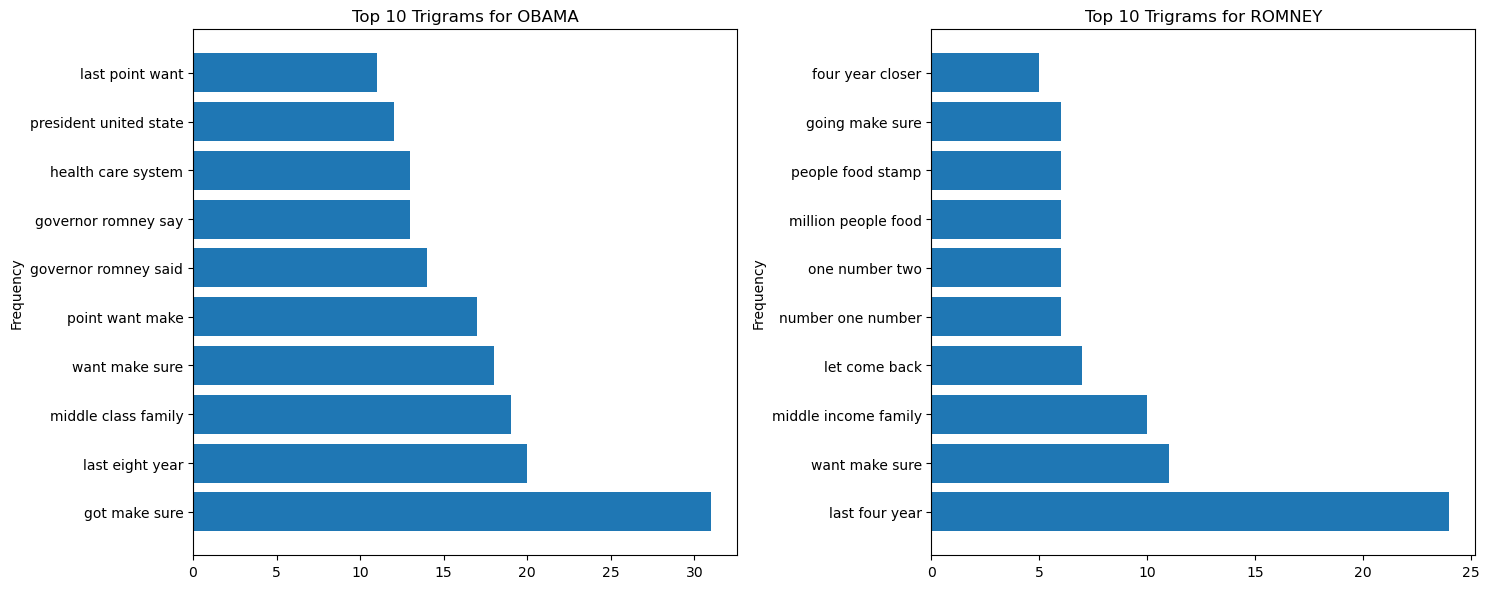

In [92]:
plot_speaker_comparison_trigrams('OBAMA', 'ROMNEY', result_df)


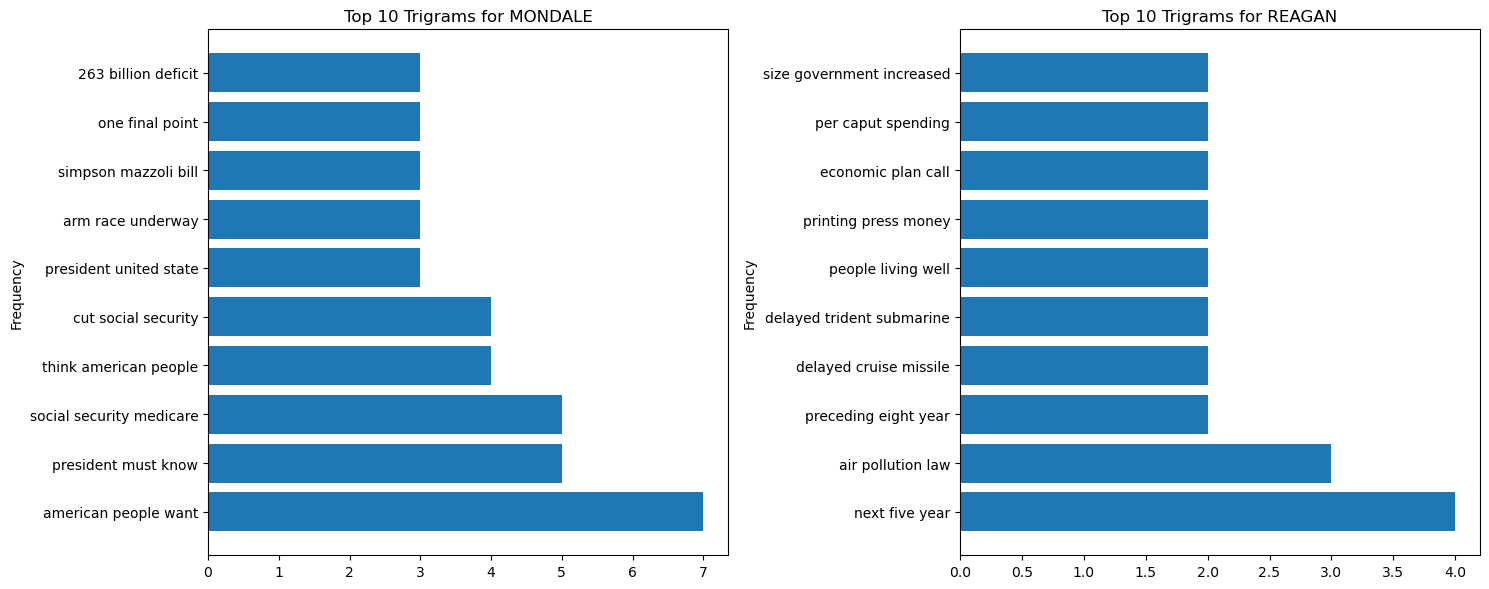

In [91]:
plot_speaker_comparison_trigrams('MONDALE', 'REAGAN', result_df)


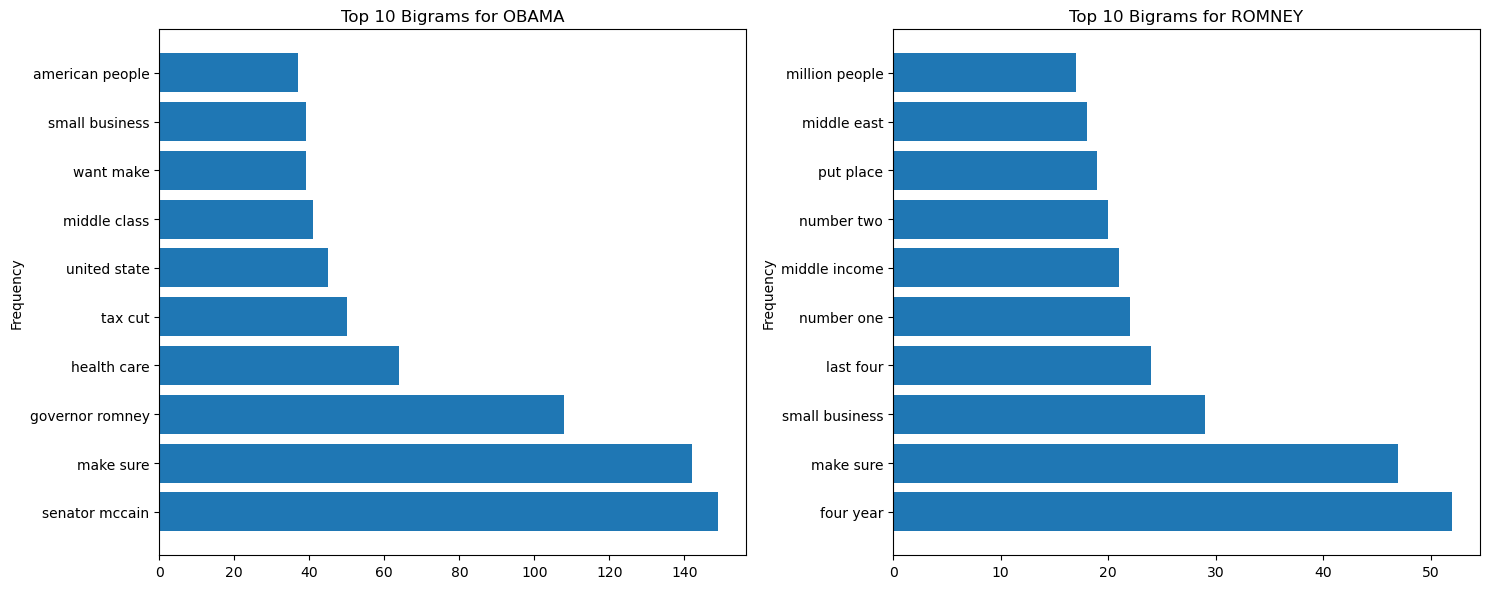

In [98]:
plot_speaker_comparison_bigrams('OBAMA', 'ROMNEY', result_df, num_words=10)


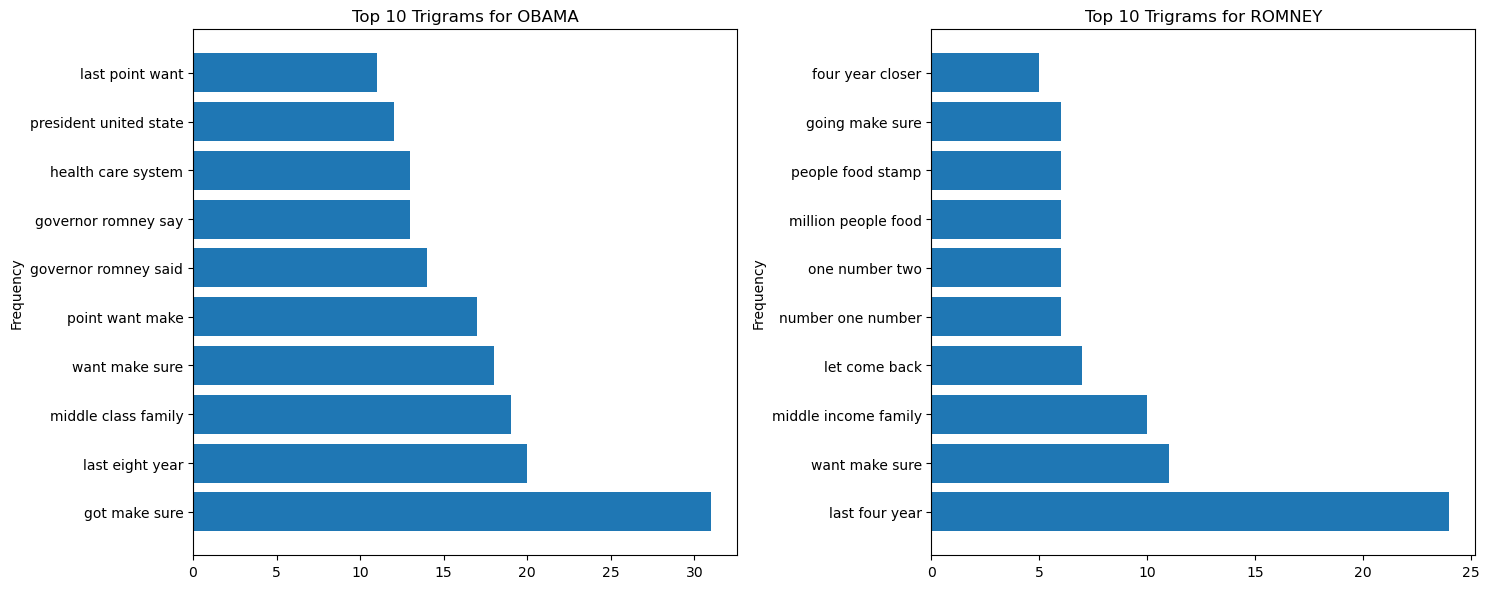

In [99]:
plot_speaker_comparison_trigrams('OBAMA', 'ROMNEY', result_df)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(result_df["tokens"], result_df['Target'], random_state=42)

In [106]:
# vectorizer = TfidfVectorizer()
# vectorizer.fit(X_train)
# X_train_vectorized = vectorizer.transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)


In [107]:
# mnb = MultinomialNB()
# mnb = mnb.fit(X_train_vectorized, y_train)


In [113]:
pipe = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()), 
    ('mnb', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [117]:
cross_val_score(pipe, X_train, y_train)

/Users/shelleywang/miniconda3/envs/tensorflow_test/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


array([0.63636364, 0.63636364, 0.45454545, 0.45454545, 0.5       ])

In [118]:
pipe.score(X_test, y_test)

0.5789473684210527

In [ ]:
gs = GridSearchCV(pipe, params_grid= {
    
})

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred) 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_gs.classes_)

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = pipe.predict(X_test)
# accuracy_score(y_test, y_pred)